In [1]:
%run /data/NNDSP/anal/analysis_notebooks/follow_up_analysis/util_setup.ipynb

# Hypothesis 4

## Setup

In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import subprocess
from datetime import date
import re
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

In [3]:
#project directory
project_dir = Path('/data/NNDSP')
# NNDSP data directories
nndsp_project_dir = Path('/data/NNDSP')
nndsp_bids_dir = nndsp_project_dir.joinpath('bids_uploaded_initially/bids')
nndsp_fs_dir = nndsp_project_dir.joinpath('derivatives/fs_nndsp_3T')
nndsp_bar_dir = nndsp_project_dir.joinpath('derivatives/bar_nndsp_3T')
nndsp_mriqc_dir = nndsp_project_dir.joinpath('derivatives/mriqc_2018_06_08')
nndsp_pheno_file = nndsp_project_dir.joinpath('anal/analysis_notebooks/phenotype_files/NNDSP_famid.csv')

# HCP data directories
hcp_project_dir = Path('/data/HCP_preproc')
hcp_bids_dir = hcp_project_dir.joinpath('derivatives/T1w_proc')
hcp_fs_dir = hcp_project_dir.joinpath('derivatives/fs_hcp')
hcp_bar_dir = nndsp_project_dir.joinpath('derivatives/bar_hcp')
hcp_mriqc_dir = hcp_project_dir.joinpath('derivatives/mriqc_hcp_t1w')
hcp_pheno_file = nndsp_project_dir.joinpath('nino/HCP_ages.csv')
hcp_pheno2_file = nndsp_project_dir.joinpath('anal/analysis_notebooks/phenotype_files/hcp_unrestricted.csv')

# NKI data directories
nki_project_dir = nndsp_project_dir
nki_bids_dir = nki_project_dir.joinpath('anal/NKI')
nki_fs_dir = nki_project_dir.joinpath('derivatives/fs_nki_3T')
nki_bar_dir = nki_project_dir.joinpath('derivatives/bar_nki_3T')
nki_mriqc_dir = nki_project_dir.joinpath('derivatives/mriqc_nki_2018_07_16')
nki_pheno_file = nki_project_dir.joinpath('anal/analysis_notebooks/phenotype_files/participants.tsv')

# CoRR data directories
corr_project_dir = Path('/data/DSST/CoRR')
corr_bids_dir = corr_project_dir.joinpath('bids_corr')
corr_fs_dir = corr_project_dir.joinpath('derivatives/fs_3T_corr')
corr_bar_dir = corr_project_dir.joinpath('derivatives/bar_3T_corr/baracus')
corr_mriqc_dir = corr_project_dir.joinpath('derivatives/mriqc_corr')
corr_pheno_file = corr_project_dir.joinpath('phenotype_files/corr_ages.csv')

# SALD data directories
sald_project_dir = Path('/data/DSST/SALD')
sald_bids_dir = sald_project_dir.joinpath('bids_sald')
sald_fs_dir = sald_project_dir.joinpath('derivatives/fs_3T_sald')
sald_bar_dir = sald_project_dir.joinpath('derivatives/bar_3T_sald/baracus')
sald_mriqc_dir = sald_project_dir.joinpath('derivatives/mriqc_sald')
sald_pheno_file = sald_project_dir.joinpath('phenotype_files/sub_information.xlsx')

### Load MRIQC

In [4]:
import json
import re

In [13]:
df_nndsp = mriqc_df(nndsp_mriqc_dir, nndsp_pheno_file, data='NNDSP', data_class = 3, 
                    merge_df = (nndsp_subjectdata(nndsp_fs_dir, nndsp_pheno_file)[['subject', 'sex', 'age']]))
df_hcp = mriqc_df(hcp_mriqc_dir, hcp_pheno_file, data='HCP', data_class = 4, 
                 merge_df = (hcp_subjectdata(hcp_fs_dir, hcp_pheno_file, hcp_pheno2_file)[['subject', 'sex', 'age']]))
df_nki = mriqc_df(nki_mriqc_dir, nki_pheno_file, data='NKI', data_class = 5,
                 merge_df = (nki_subjectdata(nki_fs_dir, nki_pheno_file)[['subject', 'sex', 'age']]))
df_corr = mriqc_df(corr_mriqc_dir, corr_pheno_file, data='CoRR', data_class = 6, 
                  merge_df = (corr_subjectdata(corr_fs_dir, corr_pheno_file)[['subject','sex', 'age']]))
df_sald = mriqc_df(sald_mriqc_dir, sald_pheno_file, data='SALD', data_class = 7,
                  merge_df = (sald_subjectdata(sald_fs_dir, sald_pheno_file)[['subject', 'sex', 'age']]))

True
True


In [17]:
df_all = pd.concat([df_nndsp, df_hcp, df_nki, df_corr, df_sald], axis=0, join='outer', sort=False)
df_all.head()

subject session_id  acq_id  run_id       cjv       cnr       efc  \
0     102          1     0.0     1.0  0.450745  2.966345  0.731650   
1     114          1     0.0     1.0  0.597186  2.285747  0.738215   
2     126          1     0.0     1.0  0.325163  4.105503  0.715936   
3     127          1     0.0     1.0  0.331401  4.022244  0.731355   
4     133          1     0.0     1.0  0.374933  3.617528  0.634474   

           fber  fwhm_avg    fwhm_x    ...      summary_wm_p95  \
0  26904.433594  3.339224  3.681080    ...         1081.648413   
1  25883.199219  3.400049  3.794461    ...         1084.025879   
2  22670.064453  3.143957  3.302560    ...         1096.440839   
3  30989.095703  3.051045  3.257622    ...         1095.220068   
4   8574.626953  3.196221  3.525169    ...         1068.836938   

   summary_wm_stdv  tpm_overlap_csf  tpm_overlap_gm  tpm_overlap_wm    wm2max  \
0        49.010384         0.222196        0.505360        0.562915  0.424826   
1        49.015297         0.213160        0.493546        0.555361  0.398110   
2        57.998871         0.202775        0.545467        0.515358  0.378795   
3        57.538391         0.199213        0.536563        0.520068  0.380536   
4        43.263741         0.192762        0.516845        0.550855  0.458206   

   dataset  data_class  sex        age  
0    NNDSP           3    2  28.542094  
1    NNDSP           3    2  25.957563  
2    NNDSP           3    2   6.015058  
3    NNDSP           3    2   7.926078  
4    NNDSP           3    1  22.168378  

[5 rows x 76 columns]

### Meta QC Information

In [9]:
# dataset numberical mapping
dataset_mapping = {
    '3' : 'nndsp',
    '4' : 'hcp',
    '5' : 'nki',
    '6' : 'corr',
    '7' : 'sald'
}
# sex numberical mapping
sex_mapping = {
    '1' : 'female',
    '2' : 'male'
}

In [10]:
qc_metrics = ['cjv', 'cnr','efc', 'fber',
       'fwhm_avg', 'fwhm_x', 'fwhm_y', 'fwhm_z', 'icvs_csf', 'icvs_gm',
       'icvs_wm', 'inu_med', 'inu_range', 'qi_1', 'qi_2', 'rpve_csf',
       'rpve_gm', 'rpve_wm', 'size_x', 'size_y',
       'size_z', 'snr_csf', 'snr_gm', 'snr_total', 'snr_wm', 'snrd_csf',
       'snrd_gm', 'snrd_total', 'snrd_wm', 'spacing_x', 'spacing_y',
       'spacing_z', 'summary_bg_k', 'summary_bg_mad',
       'summary_bg_mean', 'summary_bg_median', 'summary_bg_n',
       'summary_bg_p05', 'summary_bg_p95', 'summary_bg_stdv', 'summary_csf_k',
       'summary_csf_mad', 'summary_csf_mean', 'summary_csf_median',
       'summary_csf_n', 'summary_csf_p05', 'summary_csf_p95',
       'summary_csf_stdv', 'summary_gm_k', 'summary_gm_mad', 'summary_gm_mean',
       'summary_gm_median', 'summary_gm_n', 'summary_gm_p05', 'summary_gm_p95',
       'summary_gm_stdv', 'summary_wm_k', 'summary_wm_mad', 'summary_wm_mean',
       'summary_wm_median', 'summary_wm_n', 'summary_wm_p05', 'summary_wm_p95',
       'summary_wm_stdv', 'tpm_overlap_csf', 'tpm_overlap_gm',
       'tpm_overlap_wm', 'wm2max']

## Hypothesis 4.1

If data quality varies with age, then age will predict the value of one or more data quality metrics. 

### Model

In [45]:
from sklearn import linear_model
from scipy.stats import f

p_vals = []
metrics = []

for qc_metric in qc_metrics:
    print(qc_metric)
    df_qc = pd.DataFrame([])
    df_qc[qc_metric] = df_all[[qc_metric, 'sex', 'age']].dropna()[qc_metric]
    df_qc['sex'] = df_all[[qc_metric, 'sex', 'age']].dropna()['sex']
    df_qc['age'] = df_all[[qc_metric, 'sex', 'age']].dropna()['age']
    
#     for s in df_qc.sex.drop_duplicates():
#         df_qc[sex_mapping[str(s)]] = [1 if s == df_qc.sex.values[x] else 0 for x in range(0,len(df_qc))]
        
    y = df_qc[qc_metric]
    X = df_qc[['sex', 'age']]
        
    lm_full = linear_model.LinearRegression().fit(X,y)
    rss_f = np.mean((lm_full.predict(X) - y) ** 2)
    
    lm_res = linear_model.LinearRegression().fit(df_qc[['sex']], y)
    rss_r = np.mean((lm_res.predict(df_qc[['sex']]) - y) ** 2)
    
    df_f = (len(df_qc) - 1) - (X.shape[1] - 1)
    df_r = (len(df_qc) - 1) - (df_qc[['sex']].shape[1] - 1)
    
    F = ((rss_r - rss_f)/(df_r - df_f))/(rss_f/df_f)
    p_val = f.sf(F, df_r - df_f, df_f)
        
    print(rss_f, rss_r)
    print(lm_full.coef_, lm_res.coef_)
    print(F)
    print(p_val)
    print(f.ppf(q=1-0.1, dfn=(df_r-df_f), dfd=df_f))
    print("")
    
    p_vals.append(p_val)
    metrics.append(qc_metric)

cjv
0.0059161075840899295 0.007427412374183634
[0.02425918 0.0024499 ] [0.01562453]
1417.780435159267
1.5889899621132288e-276
2.7064468801938424

cnr
0.3102748126077684 0.3844305355869701
[-0.17206859 -0.01716105] [-0.11158456]
1326.4507649702307
1.2994951637107193e-260
2.7064468801938424

efc
0.0025145152912574805 0.0025480428861086265
[0.02944959 0.0003649 ] [0.0281635]
74.00159866627999
1.003321936722787e-17
2.7064468801938424

fber
222123252.0538025 224328204.3018166
[437.82543575 -93.57742424] [767.63857164]
55.09321902739937
1.3231616876984387e-13
2.7064468801938424

fwhm_avg
0.22517068171297583 0.2254146411499487
[-0.03116289  0.00098431] [-0.03463208]
6.0131046586486505
0.014230605368991008
2.7064468801938424

fwhm_x
0.23549746710482233 0.2369120442408773
[-0.05392096  0.0023702 ] [-0.06227471]
33.33752673276347
8.167536105560889e-09
2.7064468801938424

fwhm_y
0.2229774636601592 0.2230289912823945
[ 0.02879216 -0.00045237] [0.03038653]
1.282543530237011
0.2574755678889645
2.706

50306833458.795906 50312830244.441864
[27142.22909842   154.32303481] [26598.31837992]
0.6615832889248842
0.41603643048085925
2.7064468801938424

summary_wm_p05
385.8122051910104 392.99700706438693
[-4.11633537  0.16891915] [-4.71169002]
103.35507757588437
4.54783198300421e-24
2.7064468801938424

summary_wm_p95
425.57153607555995 428.0230655838678
[8.2081925  0.09867112] [7.86042666]
31.97109679039416
1.6429346487954024e-08
2.7064468801938424

summary_wm_stdv
135.53760427414753 135.6436943385228
[ 3.8372251  -0.02052621] [3.90956964]
4.344180793485614
0.037181247930753863
2.7064468801938424

tpm_overlap_csf
0.0005848146988712463 0.0006064778108280532
[-0.00704239  0.00029331] [-0.00807617]
205.5869518880686
8.233203516488003e-46
2.7064468801938424

tpm_overlap_gm
0.0006363101984437469 0.000768568432072025
[-0.01123683 -0.00072474] [-0.00868248]
1153.5776079531693
6.662329043167632e-230
2.7064468801938424

tpm_overlap_wm
0.0003644256812222006 0.0003884560563350438
[-0.00869301  0.000308

In [46]:
import statsmodels.stats.multitest as ssm

p_val_corrected = ssm.multipletests(p_vals, alpha=0.1)[1]

In [47]:
df_results = pd.DataFrame([])
df_results['metric'] = metrics
df_results['p_vals'] = p_vals
df_results['p_vals_fdr'] = p_val_corrected

In [48]:
df_results.head()

metric         p_vals    p_vals_fdr
0       cjv  1.588990e-276  0.000000e+00
1       cnr  1.299495e-260  0.000000e+00
2       efc   1.003322e-17  0.000000e+00
3      fber   1.323162e-13  3.970158e-12
4  fwhm_avg   1.423061e-02  1.580158e-01

In [49]:
df_results = df_results[df_results.p_vals_fdr <= 0.1]

### Visualize Results

cjv 0.0


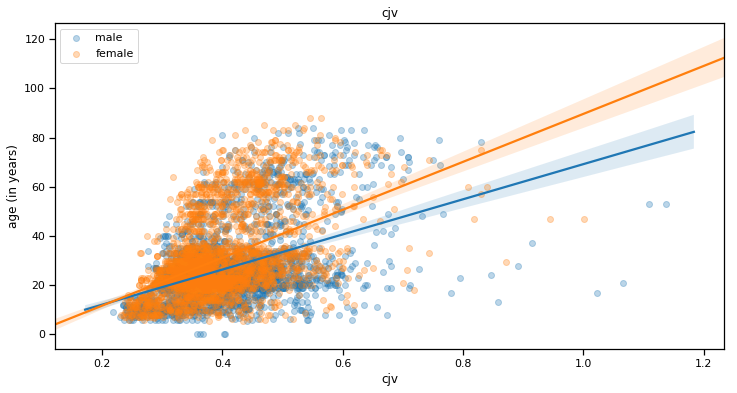

cnr 0.0


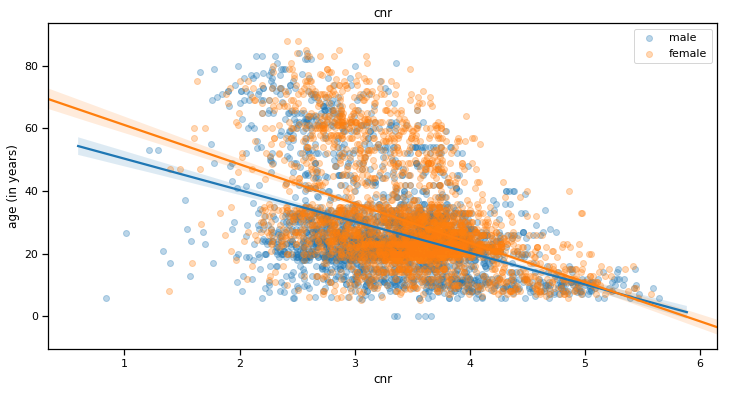

efc 0.0


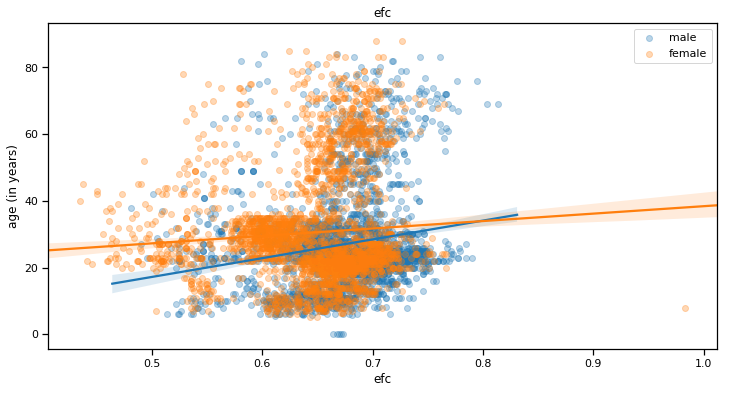

fber 3.97015753605956e-12


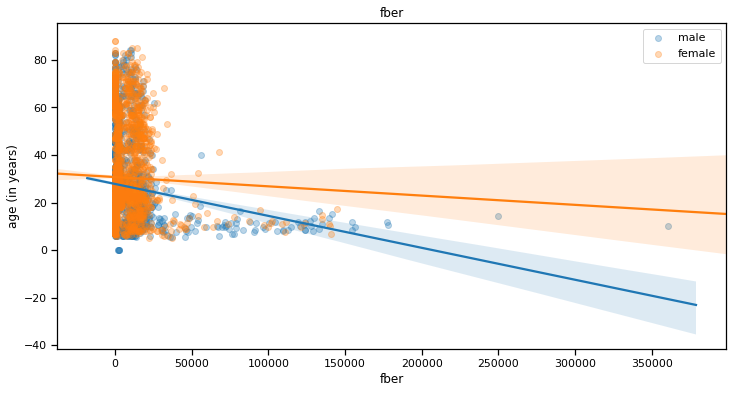

fwhm_x 1.9602084777581297e-07


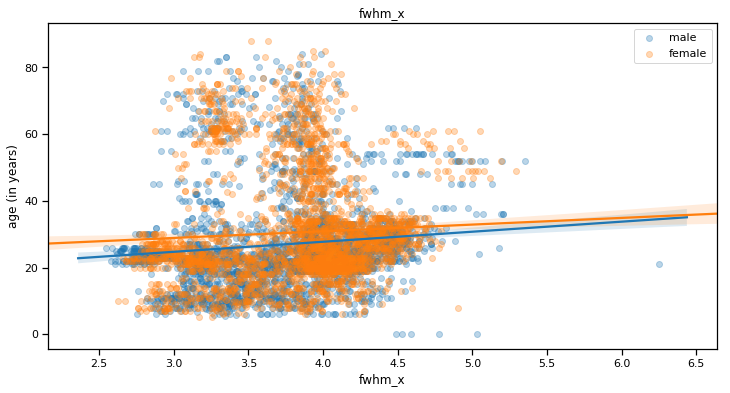

icvs_csf 0.0


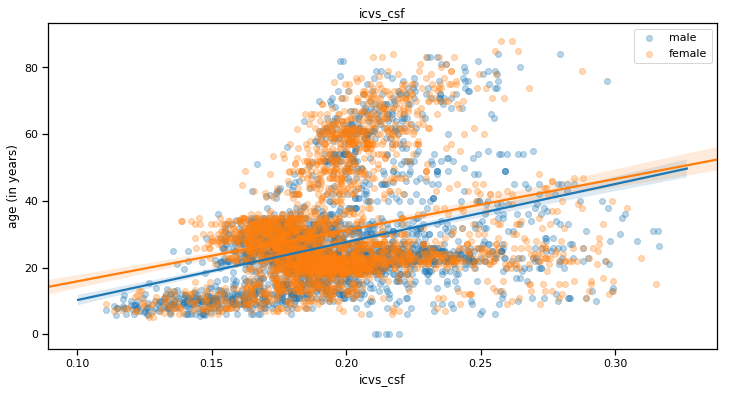

icvs_gm 0.0


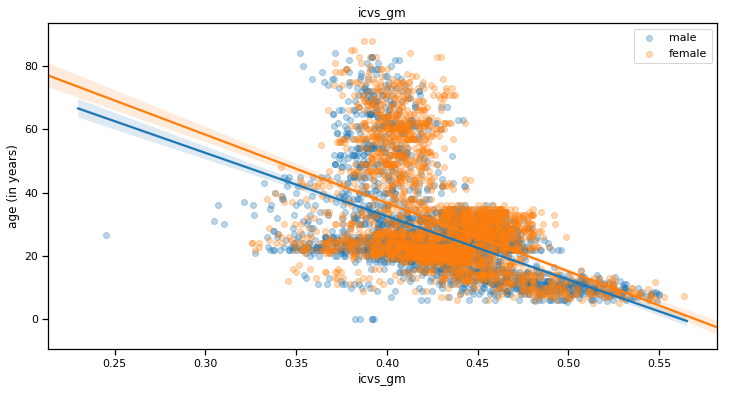

icvs_wm 0.0


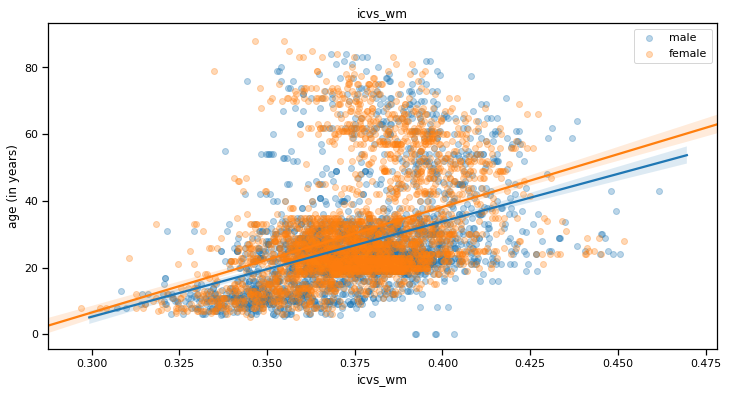

inu_med 0.0003575992038061804


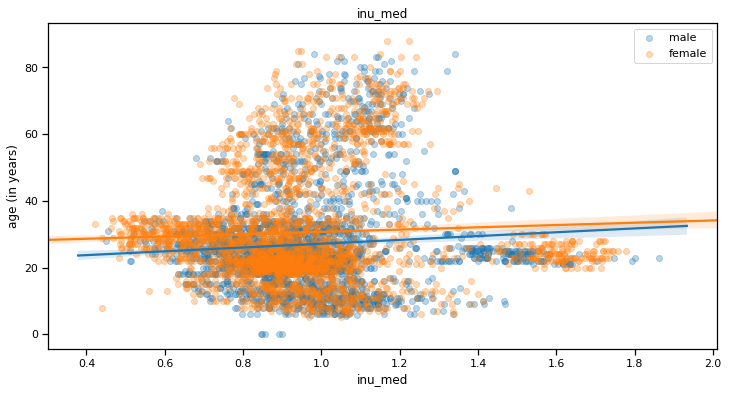

inu_range 4.532560721293155e-05


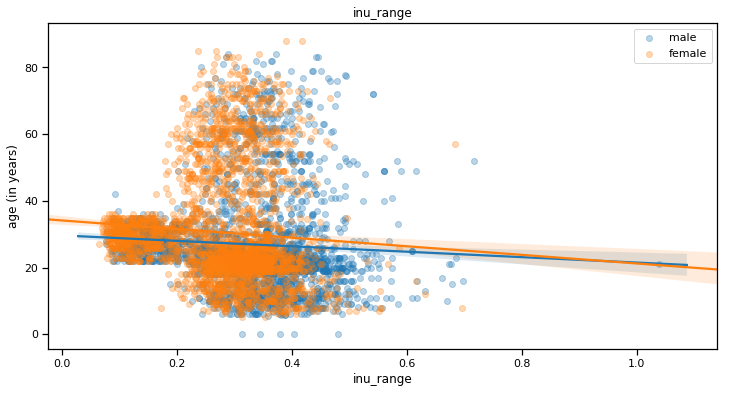

qi_2 2.601252546696742e-13


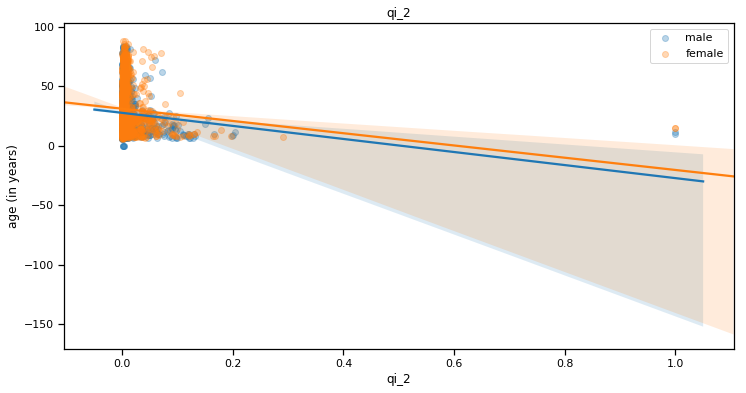

rpve_csf 1.390399129164166e-09


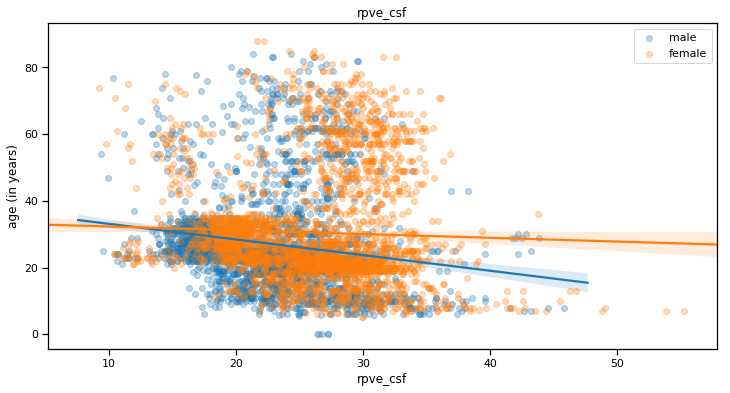

rpve_gm 0.0


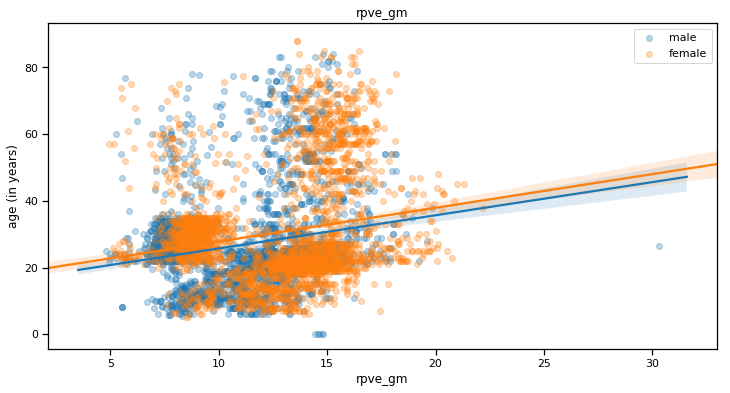

size_x 8.34353324941084e-05


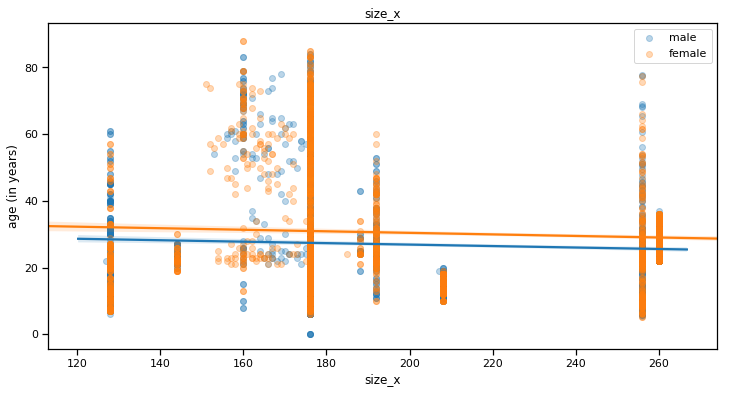

size_y 0.0


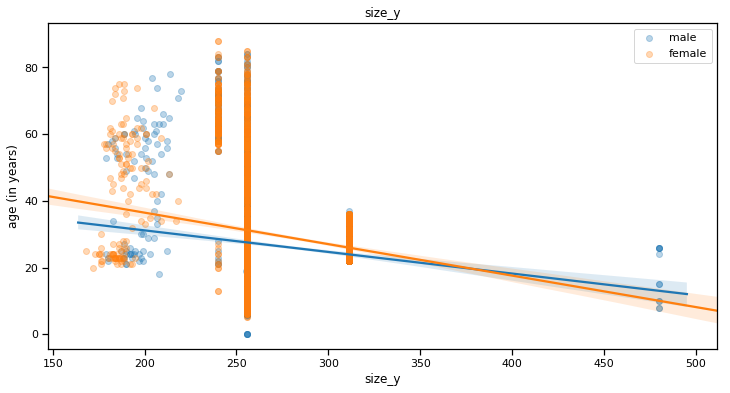

size_z 0.0


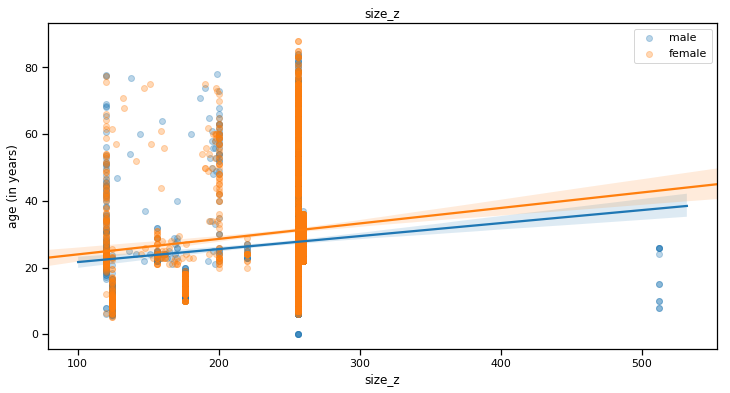

snr_csf 0.0


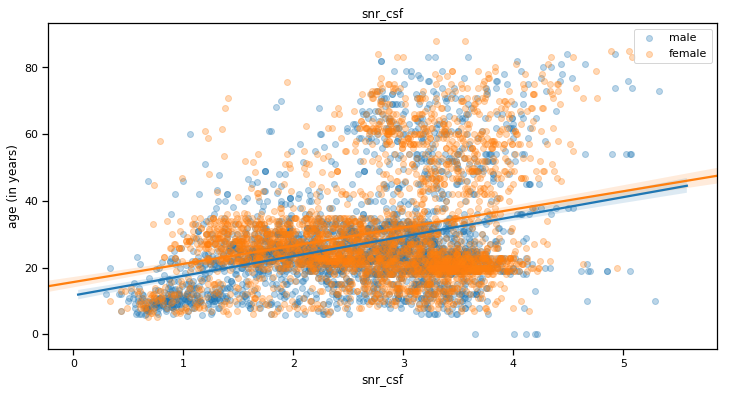

snr_gm 1.4936940573306856e-12


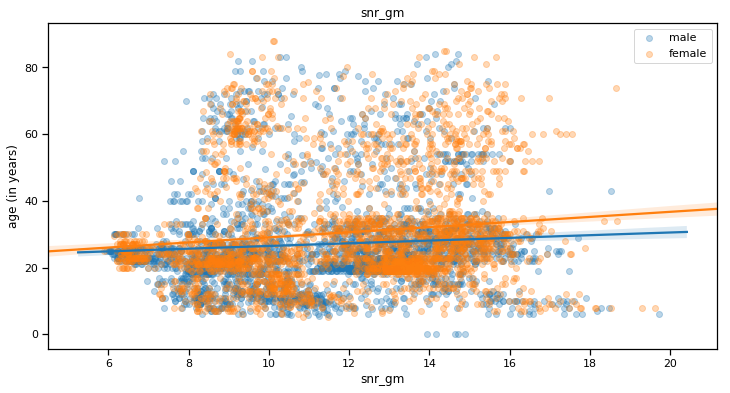

snr_total 3.774758283725532e-15


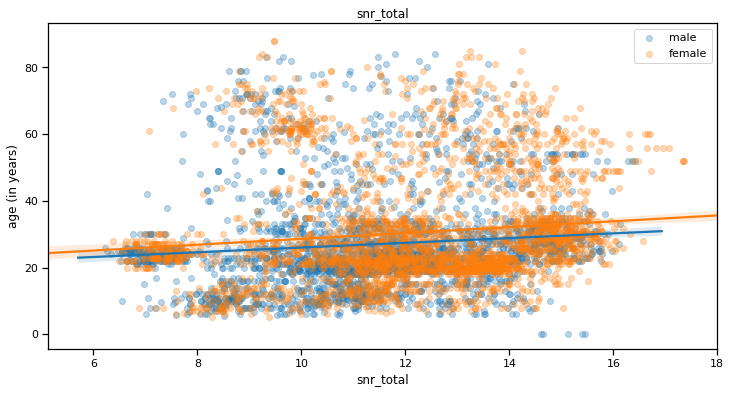

snr_wm 0.019975734585090943


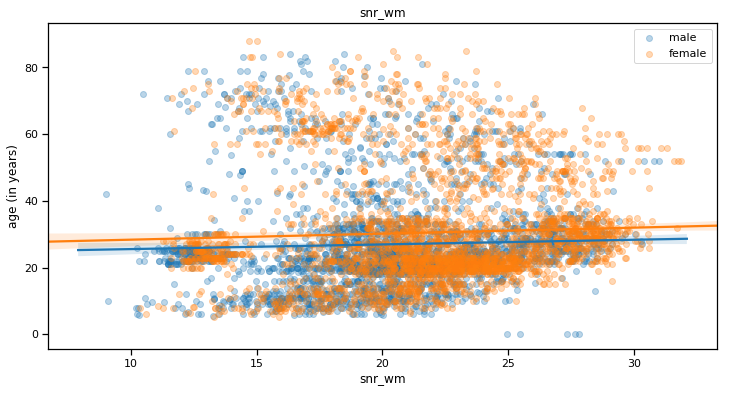

snrd_csf 0.0


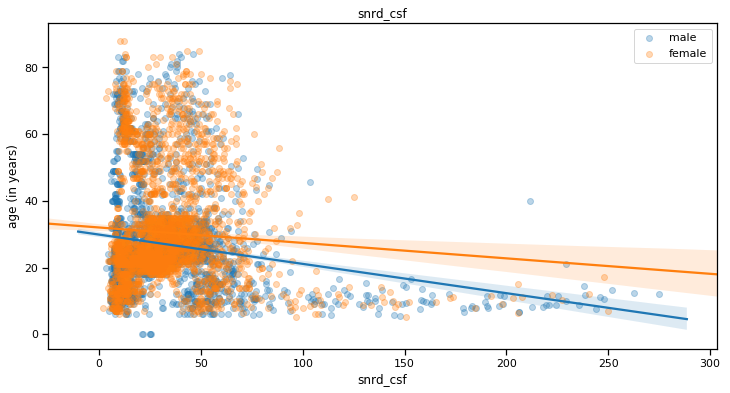

snrd_gm 3.395185054211325e-07


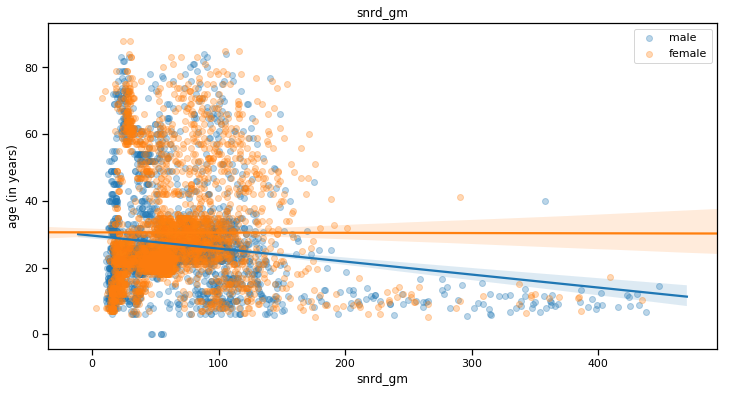

snrd_total 3.410605131648481e-13


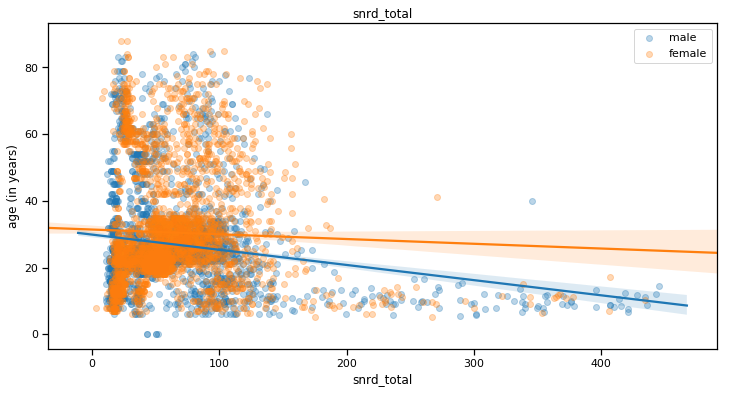

snrd_wm 0.0


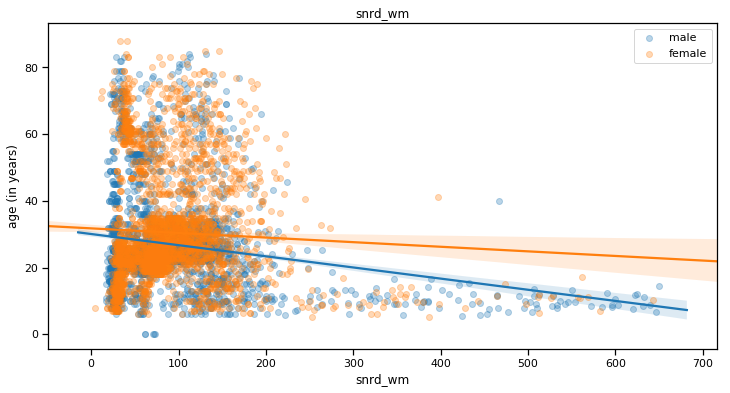

spacing_x 2.8323743350711084e-10


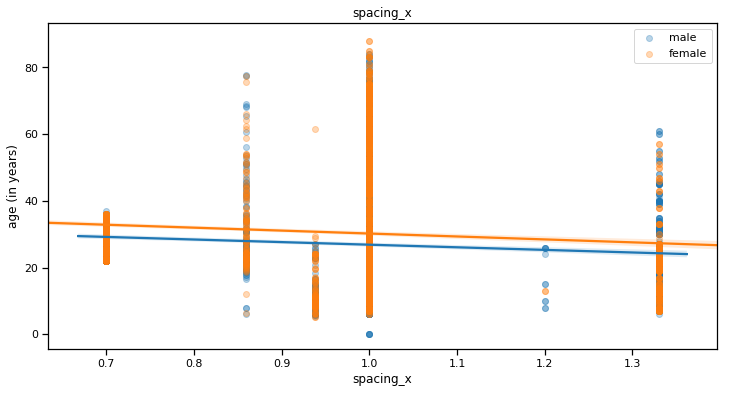

spacing_z 0.07189920511306969


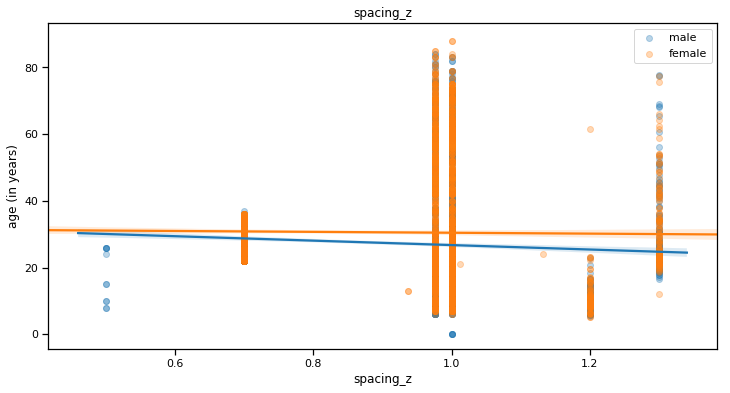

summary_bg_k 0.0


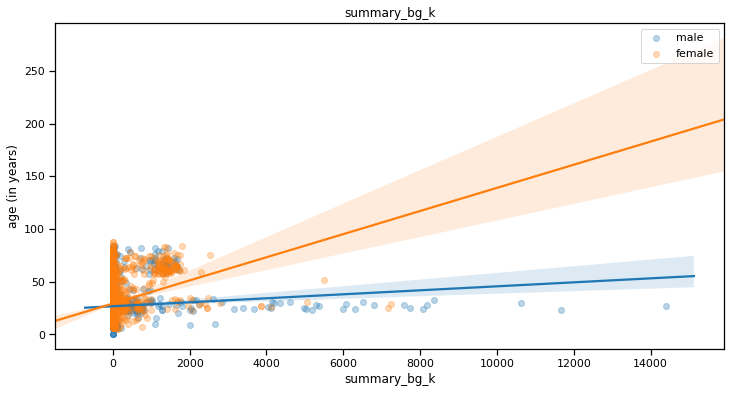

summary_bg_mean 0.0


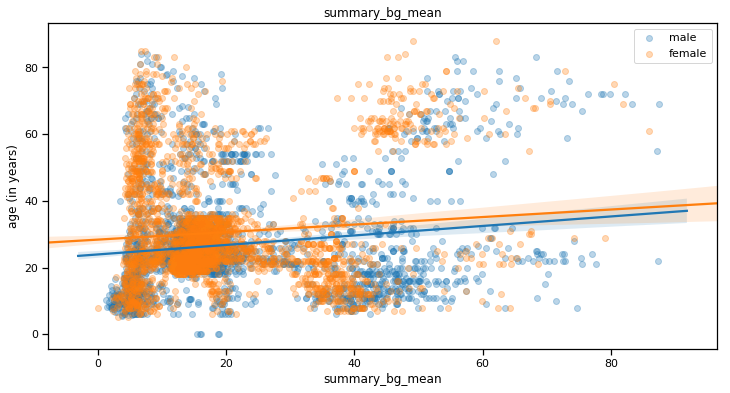

summary_bg_median 0.0


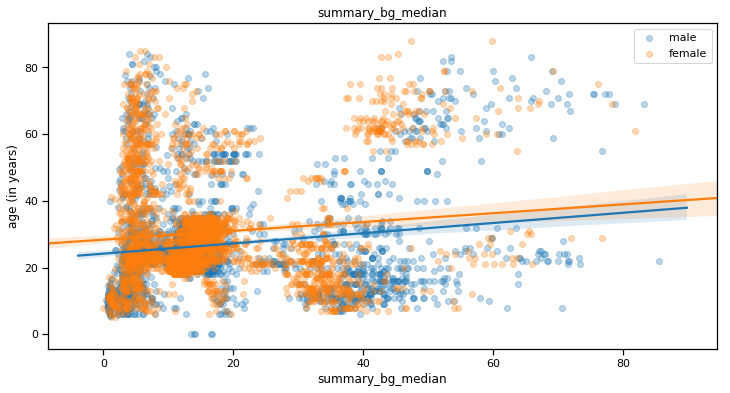

summary_bg_p05 0.0


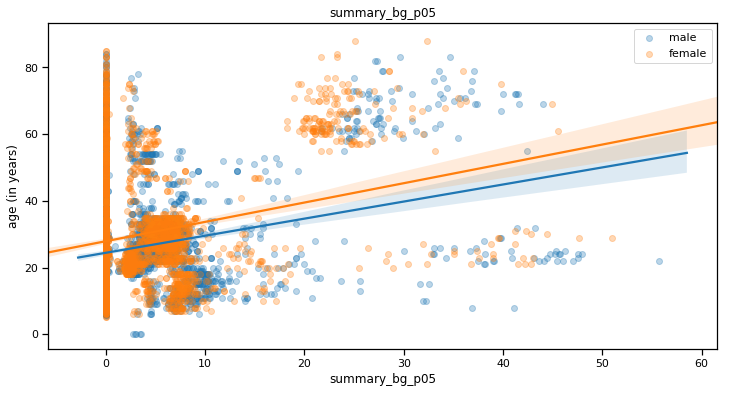

summary_bg_p95 0.008724006390967487


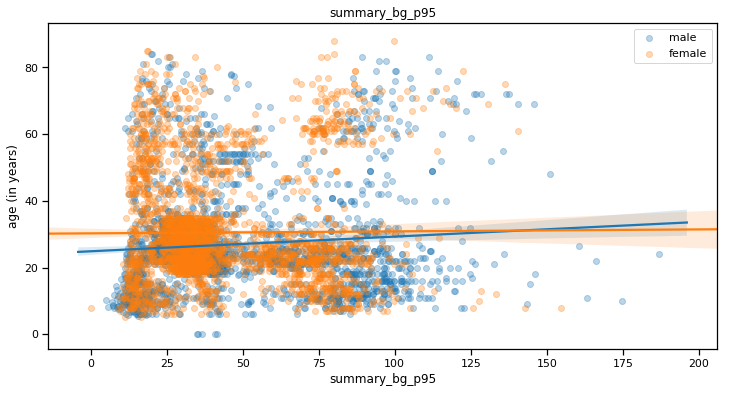

summary_csf_k 4.890643445776277e-11


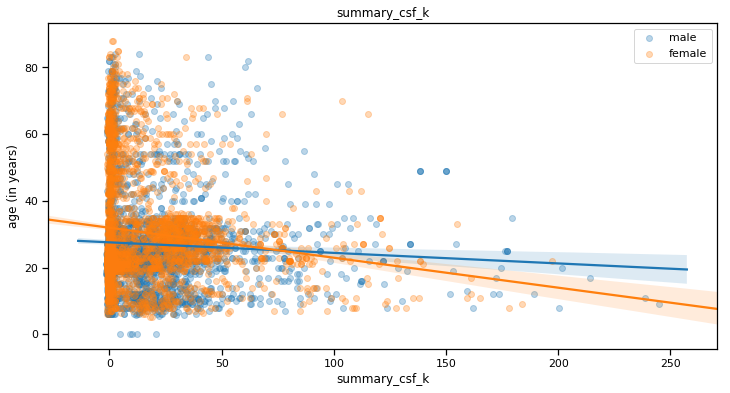

summary_csf_mad 0.0


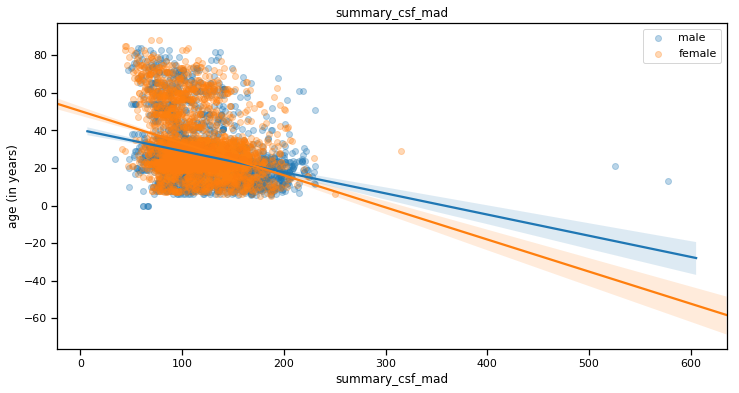

summary_csf_mean 0.00025307895399240277


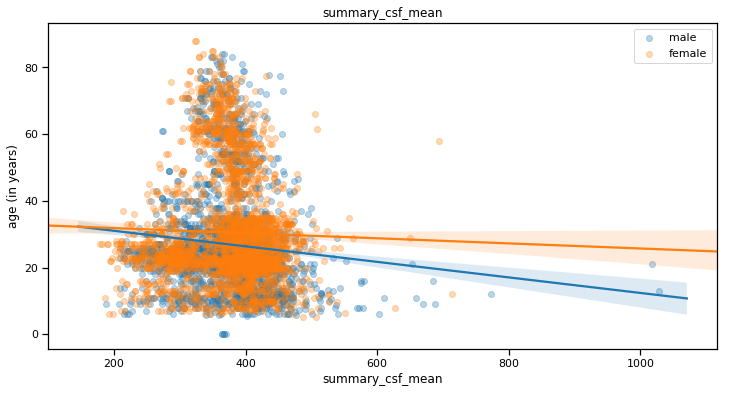

summary_csf_median 0.005404115902862161


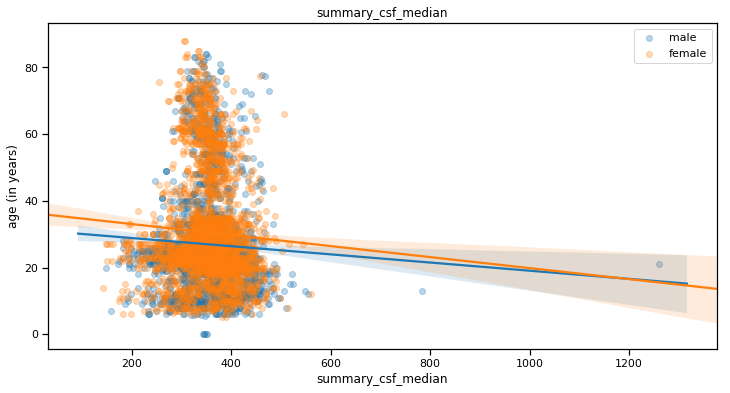

summary_csf_n 0.0


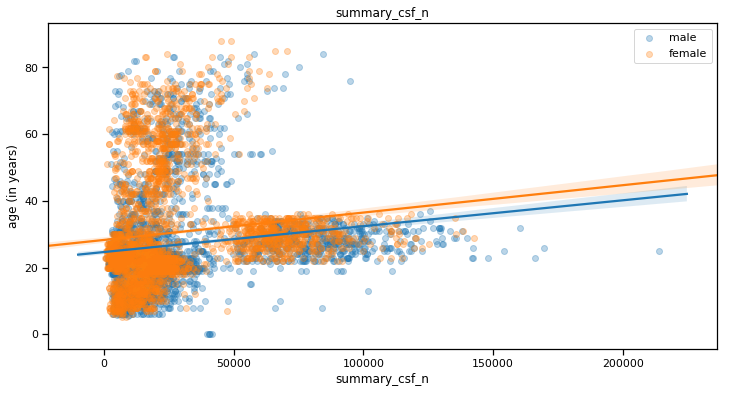

summary_csf_p05 0.0


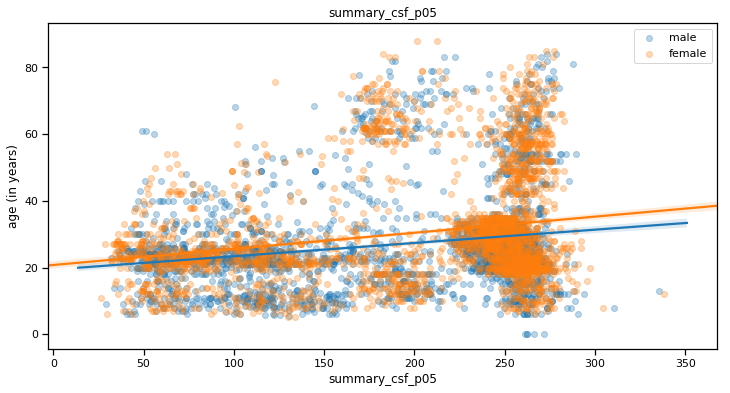

summary_csf_p95 0.0


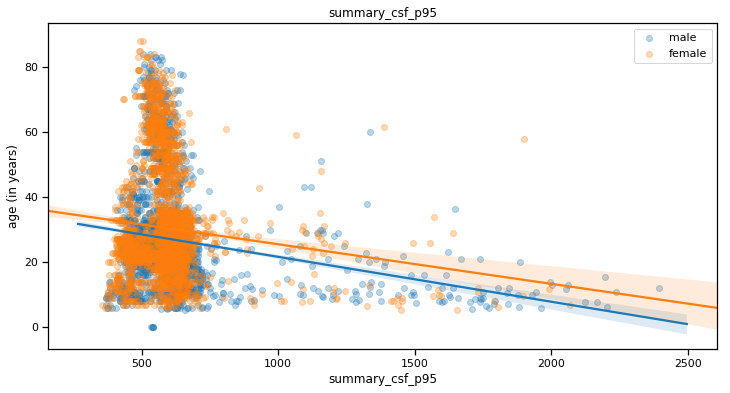

summary_csf_stdv 0.0


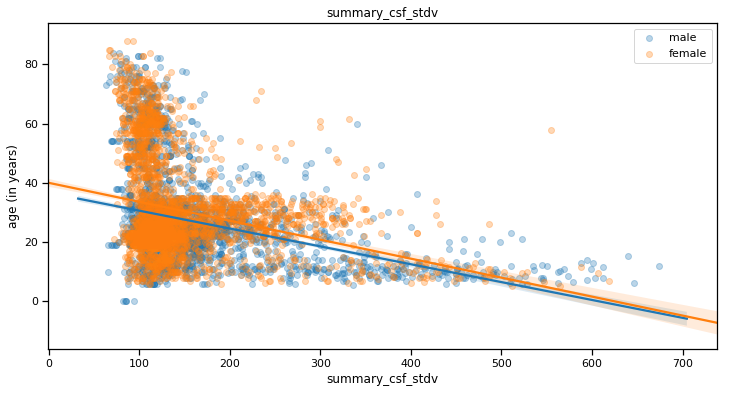

summary_gm_k 0.0


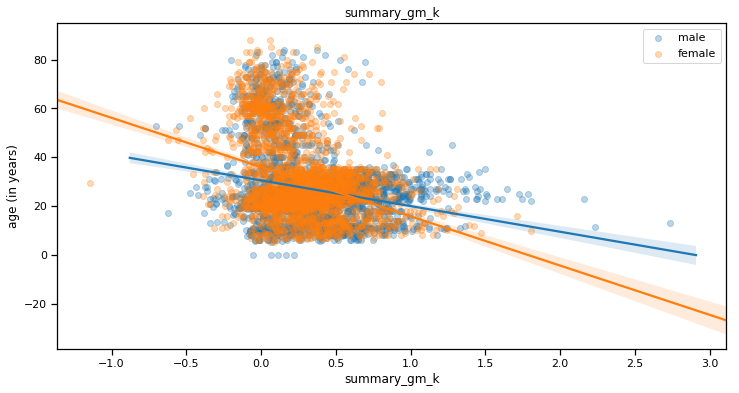

summary_gm_mad 9.448353210927962e-11


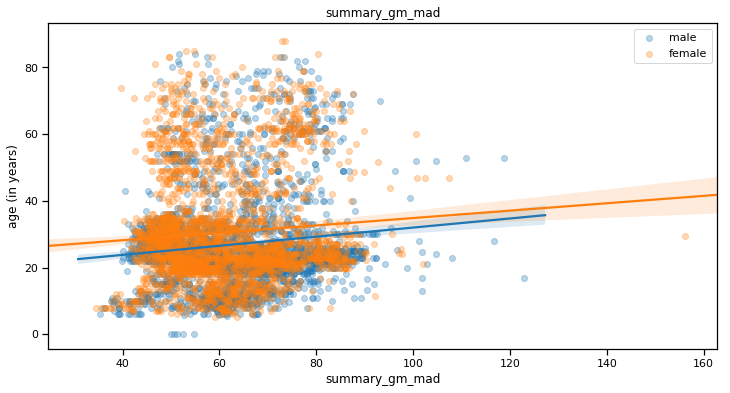

summary_gm_mean 0.0


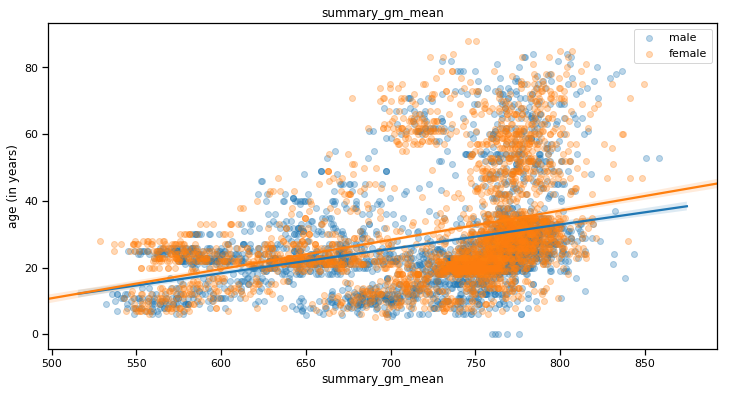

summary_gm_median 0.0


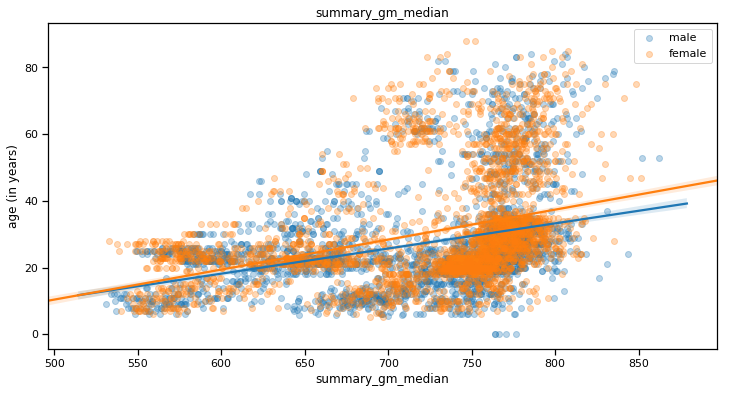

summary_gm_n 1.765102219941639e-08


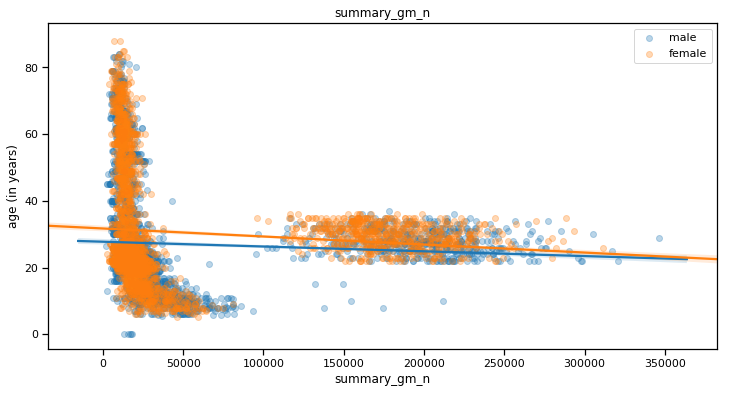

summary_gm_p05 0.0


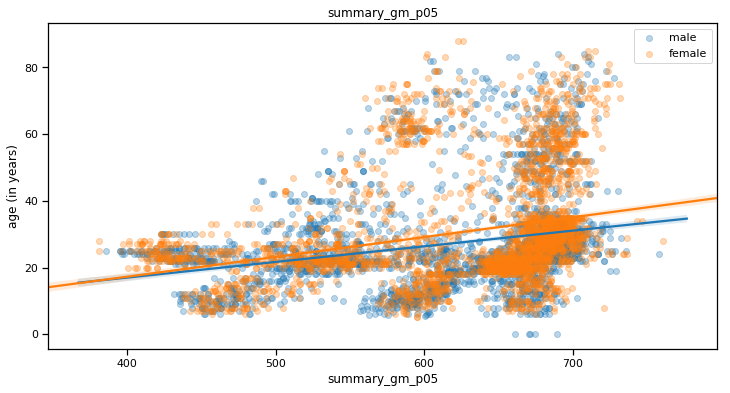

summary_gm_p95 0.0


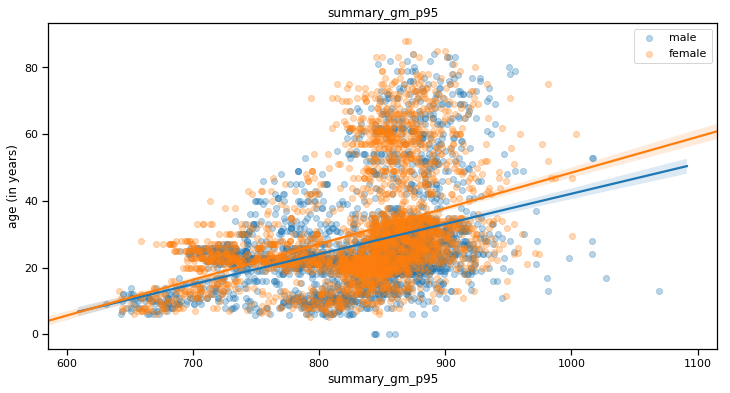

summary_gm_stdv 0.011449262814948291


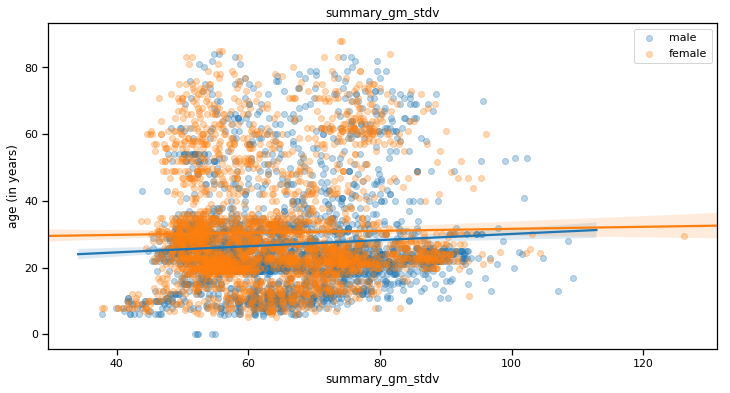

summary_wm_k 0.0


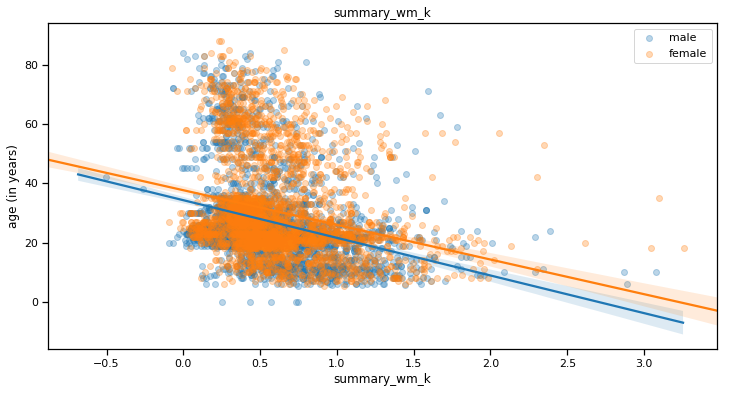

summary_wm_mean 0.0


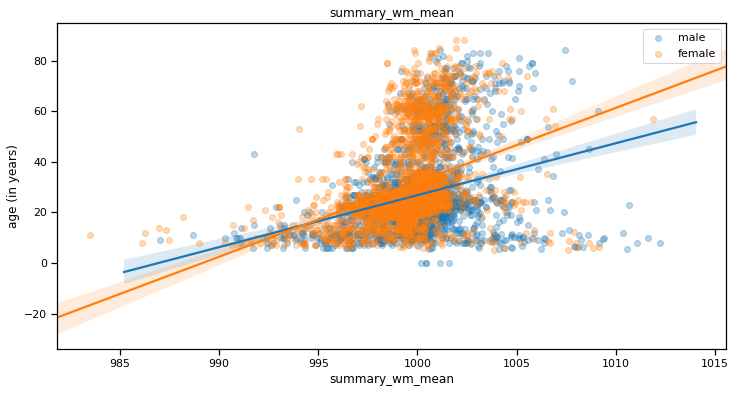

summary_wm_median 0.0


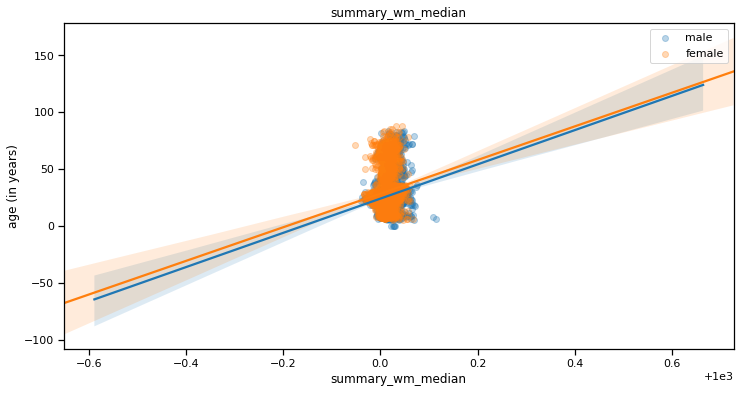

summary_wm_p05 0.0


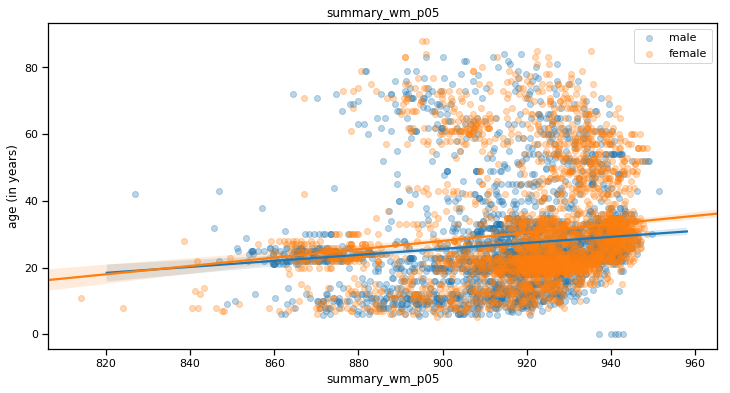

summary_wm_p95 3.6144555926043154e-07


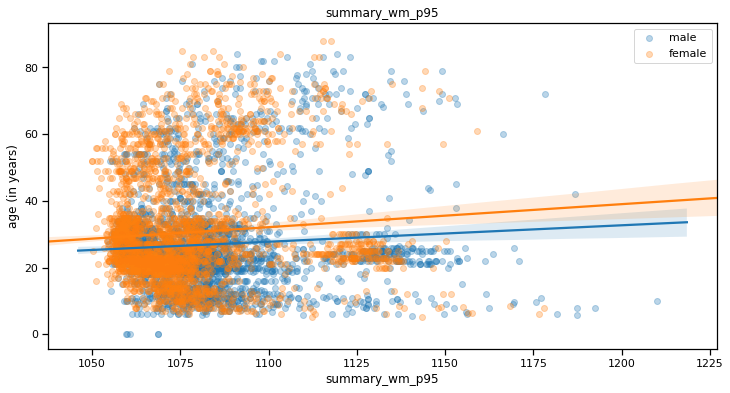

tpm_overlap_csf 0.0


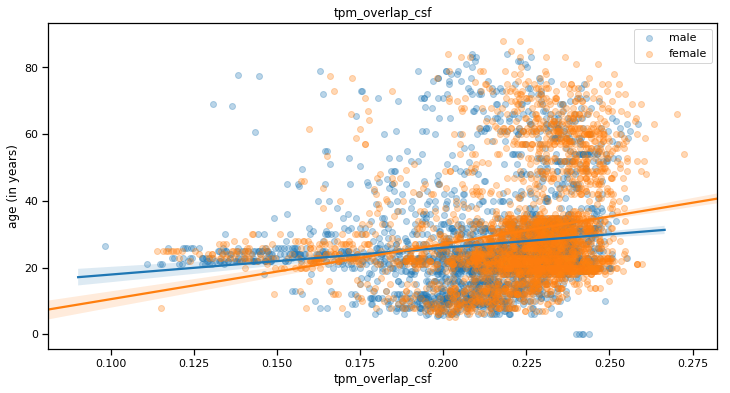

tpm_overlap_gm 0.0


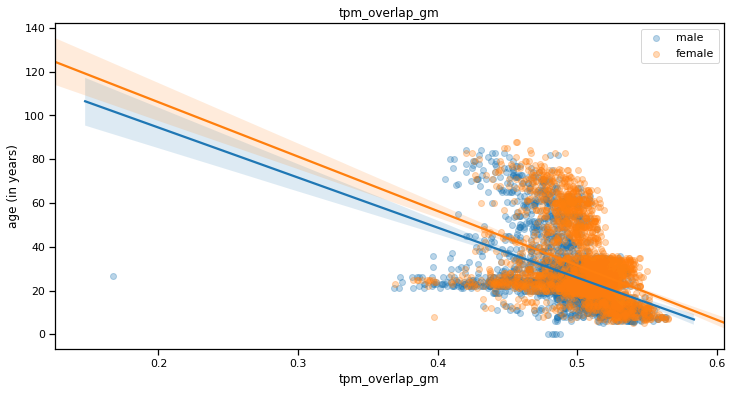

tpm_overlap_wm 0.0


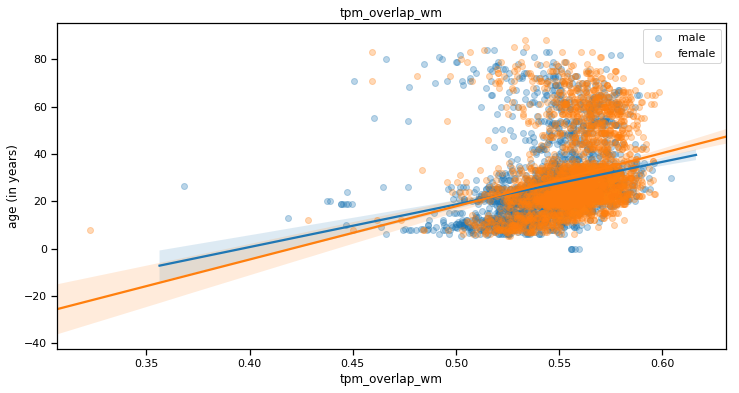

wm2max 0.0


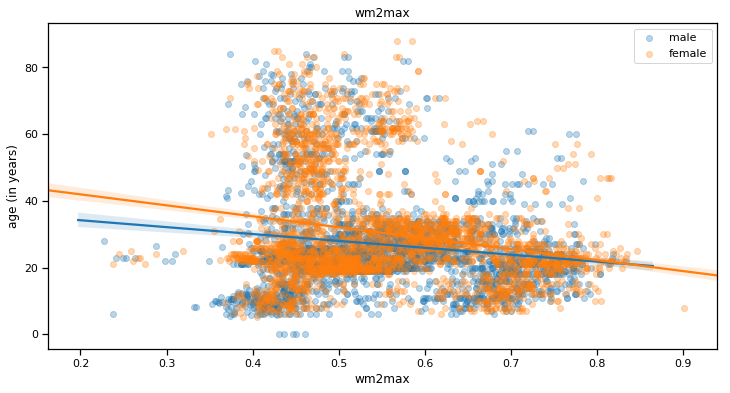

In [44]:
for i in range(len(df_results)):
    print(df_results.metric.values[i], df_results.p_vals_fdr.values[i])
    metric = df_results.metric.values[i]
    
    plt.figure(figsize=(12,6))
    sns.set_context('notebook')
    for s in df_all.sex.drop_duplicates():
        sns.regplot(df_all[df_all.sex == s][metric], df_all[df_all.sex == s]['age'], label= sex_mapping[str(s)],  scatter_kws={'alpha':0.3})
    #sns.regplot(df_all[[metric, 'age']].dropna()[metric], df_all[[metric, 'age']].dropna()['age'])
    plt.title(metric)
    plt.xlabel(metric)
    plt.ylabel('age (in years)')
    plt.legend(loc='best')
    plt.show()